In [3]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [4]:
# Importing the dataset
Churn_data = pd.read_csv("Churn-data.csv")
#Churn_data.head()
Churn_data.shape

(10000, 14)

In [5]:
Churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
Churn_data['France']= np.where(Churn_data.Geography == 'France',1,0)
Churn_data['Spain']= np.where(Churn_data.Geography == 'Spain',1,0)
Churn_data['Germany']= np.where(Churn_data.Geography == 'Germany',1,0)

Churn_data['Female']= np.where(Churn_data.Gender == 'Female',1,0)
Churn_data['Male']= np.where(Churn_data.Gender == 'Male',1,0)

In [7]:
def returnFeatureImportance(est, col):
    feature_importance = est.feature_importances_
    feature_importance_rel = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance_rel)
    featuresNames = []
    featureImps =[]
    featureImps_Rel = []
    for item in sorted_idx[::-1][:]:
        featuresNames.append(np.asarray(col)[item])
        featureImps.append(feature_importance[item])
        featureImps_Rel.append(feature_importance_rel[item])
    featureImportance = pd.DataFrame([featuresNames, featureImps, featureImps_Rel]).transpose()
    featureImportance.columns = ['FeatureName', 'Importance', 'Relative Importance']
    return featureImportance

In [8]:
#from sklearn.tree import DecisionTreeClassifier
# Get the Classification Report, Confusion Matrix, ROC Plots and Feature Importance for the model


def roc_plot(fpr, tpr, fpr_tst, tpr_tst, var):
    fig=plt.plot(fpr, tpr, label='Train')
    fig=plt.plot(fpr_tst, tpr_tst, label='Test')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title("ROC curve using " + var + " data")
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc='lower right')
    plt.grid(True)
    #save(output+'roc_'+var, ext="png", close=False, verbose=True)  
    plt.show()

      
    
def get_confmatrix_roc_featimp(est, prefix, X_train1, X_test1, Y_train, Y_test):
    # Predicting target variable for training and 2015&2016 testing dataset
    train_pred = est.predict(X_train1)
    test_pred = est.predict(X_test1)
    train_pred_prob = est.predict_proba(X_train1)[:,1]
    test_pred_prob = est.predict_proba(X_test1)[:,1]
    
    # Confusion Matrix for Train dataset 
    print ("\nTrain Data for - " + prefix )
    expected = Y_train
    predicted = est.predict(X_train1)
    class_rep_tr = metrics.classification_report(expected, predicted)
    print ("Classification report of the model " + prefix + " is:\n ", class_rep_tr)
    conf_mat_tr = metrics.confusion_matrix(expected, predicted)
    print ("Confusion matrix of the model " + prefix + " is:\n ", conf_mat_tr)
    acc_tr=metrics.accuracy_score(expected, predicted)
    print ("Accuracy of the model " + prefix + " is: ", acc_tr)
    sensitivity_tr=metrics.recall_score(expected, predicted)
    print ("Recall/Sensitivity of the model " + prefix + " is: ", sensitivity_tr)
    
    # Confusion Matrix for Test dataset
    print ("\n\nTest Data for - " + prefix)
    expected = Y_test 
    predicted = est.predict(X_test1)
    class_rep_tst = metrics.classification_report(expected, predicted)
    print ("Classification report of the model " + prefix + " is:\n ", class_rep_tst)
    conf_mat_tst = metrics.confusion_matrix(expected, predicted)
    print ("Confusion matrix of the model " + prefix + " is:\n ", conf_mat_tst)
    acc_tst=metrics.accuracy_score(expected, predicted)
    print ("Accuracy of the model " + prefix + " is: ", acc_tst)
    sensitivity_tst=metrics.recall_score(expected, predicted)
    print ("Recall/Sensitivity of the model " + prefix + " is: ", sensitivity_tst)
    
    # ROC Curve for Train data
    fpr, tpr, thresholds = metrics.roc_curve(Y_train, train_pred_prob)
    AUC_Train = metrics.roc_auc_score(Y_train, train_pred_prob)
    print ("train_" + prefix + "_AUC = " , AUC_Train)
    # ROC Curve for Test data
    fpr_tst, tpr_tst, thresholds = metrics.roc_curve(Y_test, test_pred_prob)
    tr_tst_prefix = "train_test_" + prefix
    roc_plot(fpr, tpr, fpr_tst, tpr_tst, prefix)
    AUC_Test = metrics.roc_auc_score(Y_test, test_pred_prob)
    print ("test_" + prefix + "_auc = " , AUC_Test)
    
    # Feature Importances
    #featureImp = returnFeatureImportance(est, X_train1.columns)
    #featureImp.to_csv(output+"FeatureImp_" + prefix + ".csv")
    
    return test_pred_prob, train_pred_prob, class_rep_tr, conf_mat_tr, class_rep_tst, conf_mat_tst , acc_tr, acc_tst,sensitivity_tr, sensitivity_tst,AUC_Train, AUC_Test


In [9]:
Y = Churn_data['Exited']
X = Churn_data.drop(['Exited'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=25)

In [11]:
X_train.shape, X_test.shape

((7000, 18), (3000, 18))

In [12]:
X_train1 = X_train.drop(['RowNumber', 'CustomerId', 'Surname','Geography', 'Gender'], axis=1)
X_test1 = X_test.drop(['RowNumber', 'CustomerId', 'Surname','Geography', 'Gender'], axis=1)

#### https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html    -  Refer for Hyper Parameter explaination

In [13]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, min_samples_split=4,
                                          min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features=None, 
                                          random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                          class_weight=None, ccp_alpha=0.0)


 RF Approach Results:


Train Data for - RF
Classification report of the model RF is:
                precision    recall  f1-score   support

           0       0.87      0.96      0.91      5544
           1       0.76      0.43      0.55      1456

    accuracy                           0.85      7000
   macro avg       0.82      0.70      0.73      7000
weighted avg       0.85      0.85      0.84      7000

Confusion matrix of the model RF is:
  [[5349  195]
 [ 823  633]]
Accuracy of the model RF is:  0.8545714285714285
Recall/Sensitivity of the model RF is:  0.43475274725274726


Test Data for - RF
Classification report of the model RF is:
                precision    recall  f1-score   support

           0       0.88      0.96      0.92      2419
           1       0.74      0.45      0.56       581

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

Confusion matrix 

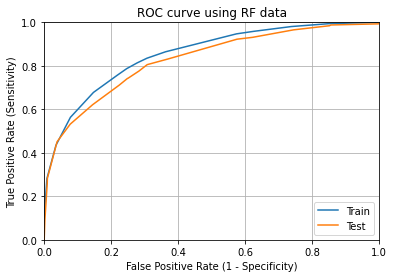

test_RF_auc =  0.8282045681100353


In [14]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train)
print ("\n RF Approach Results:\n")
RF_Prob_Test, RF_Prob_Train, class_rep_tr, conf_mat_tr, class_rep_tst, conf_mat_tst , acc_tr, acc_tst,sensitivity_tr,sensitivity_tst, AUC_Train, AUC_Test= get_confmatrix_roc_featimp(clf,'RF', X_train1, X_test1, y_train, y_test)

In [16]:
fr=  returnFeatureImportance(clf,X_train1.columns)

#### Visualizing Decision Trees

In [17]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install six

In [20]:
feature_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                'EstimatedSalary', 'France', 'Spain', 'Germany','Female', 'Male']

In [23]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [24]:
!pip install --upgrade scikit-learn==0.20.3

  ERROR: Command errored out with exit status 1:
   command: 'F:\New folder\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\win10\\AppData\\Local\\Temp\\pip-install-dtnetpiw\\scikit-learn_fe525fda89b6489498b39e60ce3801da\\setup.py'"'"'; __file__='"'"'C:\\Users\\win10\\AppData\\Local\\Temp\\pip-install-dtnetpiw\\scikit-learn_fe525fda89b6489498b39e60ce3801da\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\win10\AppData\Local\Temp\pip-wheel-mrqj98rp'
       cwd: C:\Users\win10\AppData\Local\Temp\pip-install-dtnetpiw\scikit-learn_fe525fda89b6489498b39e60ce3801da\
  Complete output (675 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:
  No module named 'nu


  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to f:\new folder\lib\site-packages\scikit_learn-0.24.2.dist-info\
   from F:\New folder\Lib\site-packages\~cikit_learn-0.24.2.dist-info
  Moving to f:\new folder\lib\site-packages\sklearn\
   from F:\New folder\Lib\site-packages\~klearn



  copying sklearn\externals\joblib\externals\loky\backend\queues.py -> build\lib.win-amd64-3.9\sklearn\externals\joblib/externals/loky/backend
  copying sklearn\externals\joblib\externals\loky\backend\reduction.py -> build\lib.win-amd64-3.9\sklearn\externals\joblib/externals/loky/backend
  copying sklearn\externals\joblib\externals\loky\backend\semaphore_tracker.py -> build\lib.win-amd64-3.9\sklearn\externals\joblib/externals/loky/backend
  copying sklearn\externals\joblib\externals\loky\backend\semlock.py -> build\lib.win-amd64-3.9\sklearn\externals\joblib/externals/loky/backend
  copying sklearn\externals\joblib\externals\loky\backend\spawn.py -> build\lib.win-amd64-3.9\sklearn\externals\joblib/externals/loky/backend
  copying sklearn\externals\joblib\externals\loky\backend\synchronize.py -> build\lib.win-amd64-3.9\sklearn\externals\joblib/externals/loky/backend
  copying sklearn\externals\joblib\externals\loky\backend\utils.py -> build\lib.win-amd64-3.9\sklearn\externals\joblib/ext

        numpy/distutils/site.cfg file (section [blas_src]) or by setting
        the BLAS_SRC environment variable.
      if self._calc_info(blas):
      NOT AVAILABLE
    
    sklearn\setup.py:73: UserWarning:
        Blas (http://www.netlib.org/blas/) libraries not found.
        Directories to search for the libraries can be specified in the
        numpy/distutils/site.cfg file (section [blas]) or by setting
        the BLAS environment variable.
      warnings.warn(BlasNotFoundError.__doc__)
    running install
    running build
    running config_cc
    unifing config_cc, config, build_clib, build_ext, build commands --compiler options
    running config_fc
    unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
    running build_src
    build_src
    building library "libsvm-skl" sources
    building library "cblas" sources
    building extension "sklearn.__check_build._check_build" sources
    building extension "sklearn.cluster._dbscan_inner" s